$\textbf{Propagation Delay Calculation}$

$\text{In this tutorial we will see how to calculate the $t_0$ with the known sample. To ensure accurate estimation you should select your peak within the big mc range. You should also make your calculation for a smal volum spacialy and for a smal varition of voltage. Another pont is that you should chose a narrow window around your peaks.}$

In [1]:
# Activate intractive functionality of matplotlib
%matplotlib ipympl
# Activate auto reload 
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
# import libraries
import os
import os.path as path
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import logging, sys
from ipywidgets import fixed, interact_manual, widgets
from ipywidgets import IntSlider, Output
from IPython.display import clear_output

# Local module and scripts
from pyccapt.calibration.calibration_tools import share_variables, tools
from pyccapt.calibration.data_tools import data_tools, data_loadcrop, dataset_path_qt
from pyccapt.calibration.mc import mc_tools
from pyccapt.calibration.calibration_tools import widgets as wd

In [2]:
button = widgets.Button(
    description='load dataset',
)
@button.on_click
def open_file_on_click(b):
    """
    Event handler for button click event.
    Prompts the user to select a dataset file and stores the selected file path in the global variable dataset_path.
    """
    global dataset_path
    dataset_path = dataset_path_qt.gui_fname().decode('ASCII')
button

Button(description='load dataset', style=ButtonStyle())

In [3]:
tdc, pulse_mode, flightPathLength_d, t0_d, max_mc, det_diam = wd.dataset_instrument_specification_selection()
display(tdc, pulse_mode, flightPathLength_d, max_mc)

Dropdown(description='Data mode:', options=('surface_concept', 'roentdec', 'leap_epos', 'leap_pos', 'ato_v6'),…

Dropdown(description='Pulse mode:', options=('voltage', 'laser'), value='voltage')

FloatText(value=110.0, description='Flight path length:')

FloatText(value=400.0, description='Max mc:')

In [4]:
# exctract needed data from Pandas data frame as an numpy array
# create an instance of the Variables opject
variables = share_variables.Variables()
variables.pulse_mode = pulse_mode
dataset_main_path = os.path.dirname(dataset_path)
dataset_name_with_extention = os.path.basename(dataset_path)
variables.dataset_name = os.path.splitext(dataset_name_with_extention)[0]
variables.result_data_path = dataset_main_path 
variables.result_data_name = 't_0_flight_path_distance_' + variables.dataset_name
variables.result_path = dataset_main_path + '/' + '/t_0_flight_path_distance/'

if not os.path.isdir(variables.result_path):
    os.makedirs(variables.result_path, mode=0o777, exist_ok=True)
    
# Create data farame out of hdf5 file dataset
data = data_tools.load_data(dataset_path, tdc.value, mode='processed')
# extract data from the path and create the Variable object
data_tools.extract_data(data, variables, flightPathLength_d.value, max_mc.value)

The maximum time of flight: 5010


In [5]:
data

,x (nm),y (nm),z (nm),mc_c (Da),mc (Da),high_voltage (V),pulse,start_counter,t_c (ns),t (ns),x_det (cm),y_det (cm),pulse_pi,ion_pp
0,0.0,0.0,0.0,0.0,23.308233,7840.419922,1568.083984,10443,0.0,492.246674,-0.796735,-1.704490,0,0
1,0.0,0.0,0.0,0.0,24.227881,7840.419922,1568.083984,10689,0.0,502.636536,-2.083265,-0.470204,206,1
2,0.0,0.0,0.0,0.0,237.987532,7840.419922,1568.083984,12430,0.0,1476.918335,2.615510,-0.862041,1741,1
3,0.0,0.0,0.0,0.0,1.733480,7840.419922,1568.083984,13763,0.0,177.251862,3.252245,-0.933878,1333,1
4,0.0,0.0,0.0,0.0,24.273461,7840.419922,1568.083984,13769,0.0,509.672852,-2.315102,-1.711020,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588430,0.0,0.0,0.0,0.0,0.106619,7995.089844,1599.017944,9457,0.0,83.468719,-2.001633,0.724898,10,1
588431,0.0,0.0,0.0,0.0,1.776843,7995.089844,1599.017944,9457,0.0,174.254929,-1.864490,0.979592,0,0
588432,0.0,0.0,0.0,0.0,11.283956,7995.089844,1599.017944,9589,0.0,361.485168,2.292245,-1.697959,132,2
588433,0.0,0.0,0.0,0.0,301.136000,7995.089844,1599.017944,9662,0.0,1629.481323,-1.949388,-1.495510,73,1


In [6]:
# exctract needed data from Pandas data frame as an numpy array
dld_highVoltage = data['high_voltage (V)'].to_numpy()

dld_pulseVoltage = data['pulse'].to_numpy()

dld_t = data['t (ns)'].to_numpy()
dld_x = data['x_det (cm)'].to_numpy()
dld_y = data['y_det (cm)'].to_numpy()
mc_seb = data['mc (Da)'].to_numpy()

In [7]:
interact_manual(tools.mc_hist_plot, variables=fixed(variables), bin_size=widgets.FloatText(value=0.1), 
                mode=widgets.Dropdown(options=[('mc', 'mc'), ('tof', 'tof')]), prominence=widgets.IntText(value=50), distance=widgets.IntText(value=100), 
                lim=widgets.IntText(value=400), percent=widgets.IntText(value=50), selector=fixed('None'), plot=fixed(True), figname=widgets.Text(value='hist'),
                peaks_find_plot=fixed(True));

C:\Users\APTUser\AppData\Local\Temp\ipykernel_45516\4033475689.py:1: DeprecationWarning: on_submit is deprecated. Instead, set the .continuous_update attribute to False and observe the value changing with: mywidget.observe(callback, 'value').
  interact_manual(tools.mc_hist_plot, variables=fixed(variables), bin_size=widgets.FloatText(value=0.1),


interactive(children=(FloatText(value=0.1, description='bin_size'), Dropdown(description='mode', options=(('mc…

In [8]:
def tof_his(bin_size, prominence, distance, percent, selector, plot, lim_mc, figname):
    variables.peaks_idx = []
    global peak_widths
    global peaks_y
    global peaks
    peaks, peaks_y, peak_widths, _ = tools.hist_plot(variables.mc_calib [variables.mc_calib  < lim_mc], variables, bin_size,  h_line=True, distance=distance, percent=percent, prominence=prominence,
                                                     selector=selector, plot=plot, label='mc', fig_name=figname, peaks_find_plot=True)

    index_max_ini = np.argmax(peaks_y)
    variables.max_peak = peaks[index_max_ini]
    mrp = (peaks[index_max_ini] / (peak_widths[index_max_ini][2] - peak_widths[index_max_ini][1]))
    print('Mass resolving power for the highest peak (MRP --> m/m_2-m_1):', mrp)
    for i in range(len(peaks)):
        print('Peaks ', i, 'is at location and height: ({:.2f}, {:.2f})'.format(peaks[i], peaks_y[i]), 'peak window sides (half-maximum) are: ({:.2f}, {:.2f})'.format(peak_widths[i][1], peak_widths[i][2]))

$\mathbf{\text{calculate the mc in two mode for laser and voltage atom probe:}}$<br><br>
$$\frac{m}{n} = k V_{dc}(\frac{t + t_{0}}{d})^{2} ,$$<br>
$\text{or:}$
$$\frac{m}{n} = k\alpha (V_{dc} + \beta V_{pulse})(\frac{t + t_{0}}{d})^{2} $$<br>

In [9]:

interact_manual(tof_his, bin_size=widgets.FloatText(value=0.1)
               ,prominence=widgets.IntText(value=50), distance=widgets.IntText(value=10), lim_mc=widgets.IntText(value=400)
               ,percent=widgets.IntText(value=80), selector=[('peak','peak'), ('rect', 'rect')], plot=fixed(True), figname=widgets.Text(value='hist'));


C:\Users\APTUser\AppData\Local\Temp\ipykernel_45516\2635086221.py:1: DeprecationWarning: on_submit is deprecated. Instead, set the .continuous_update attribute to False and observe the value changing with: mywidget.observe(callback, 'value').
  interact_manual(tof_his, bin_size=widgets.FloatText(value=0.1)


interactive(children=(FloatText(value=0.1, description='bin_size'), IntText(value=50, description='prominence'…

$\text{In the cell below you should type the correct m/c for the detected peak above}$

In [10]:
isotopeTableFile = '../../../files/isotopeTable.h5'
dataframe = data_tools.read_hdf5_through_pandas(isotopeTableFile)
elementsList = dataframe['element']
elementIsotopeList = dataframe['isotope']
elementMassList =  dataframe['weight']
abundanceList = dataframe['abundance']

elements = list(zip(elementsList, elementIsotopeList, elementMassList, abundanceList))
dropdownList = []
for element in elements:
    tupleElement = ("{} ({}) ({:.2f})".format(element[0], element[1], element[3]), "{}({})[{}]".format(element[0], element[1], element[2]))
    dropdownList.append(tupleElement)

chargeList = [(1,1,),(2,2,),(3,3,),(4,4,)]
dropdown = wd.dropdownWidget(dropdownList,"Elements")
dropdown.observe(wd.on_change)


chargeDropdown = wd.dropdownWidget(chargeList,"Charge")
chargeDropdown.observe(wd.on_change_charge)

wd.compute_element_isotope_values_according_to_selected_charge()

buttonAdd = wd.buttonWidget("ADD")
buttonDelete = wd.buttonWidget("DELETE")
buttonReset = wd.buttonWidget("RESET")

display(dropdown, chargeDropdown, buttonAdd, buttonDelete, buttonReset)

def buttonAdd_f(b,):
    with out:
        clear_output(True)
        wd.onClickAdd(b, variables)
        display()
def buttonDelete_f(b,):
    with out:
        clear_output(True)
        wd.onClickDelete(b, variables)
        display()
def buttonResett_f(b,):
    with out:
        clear_output(True)
        wd.onClickReset(b, variables)
        display()

listMaterial = buttonAdd.on_click(buttonAdd_f)
buttonDelete.on_click(buttonDelete_f)
buttonReset.on_click(buttonResett_f)
# listMaterial = buttonAdd.on_click(wd.onClickAdd)
# buttonDelete.on_click(wd.onClickDelete)
# buttonReset.on_click(wd.onClickReset)
out = Output()
display(out)

Dropdown(description='Elements', options=(('H (1) (99.98)', 'H(1)[1.01]'), ('H (2) (0.01)', 'H(2)[2.01]'), ('H…

Dropdown(description='Charge', options=((1, 1), (2, 2), (3, 3), (4, 4)), value=1)

Button(description='ADD', icon='check', style=ButtonStyle(), tooltip='ADD')

Button(description='DELETE', icon='check', style=ButtonStyle(), tooltip='DELETE')

Button(description='RESET', icon='check', style=ButtonStyle(), tooltip='RESET')

Output()

In [11]:
# The correct peak location based on your sample
peak_ideal = variables.listMaterial

$\text{Here for each peak a mask will be created}$

In [12]:
pick_ions_plot = []
mask = np.zeros(len(mc_seb), dtype=bool)
mc_seb_ideal = np.zeros(len(mc_seb))
# creat mask for each peak base on the peak loc. and window size
for i in range(len(variables.peaks_idx)):
    # print(peak_widths[variables.peaks_idx[i]][1], peak_widths[variables.peaks_idx[i]][2])
    mask_tmp = np.logical_and((peak_widths[variables.peaks_idx[i]][1] < mc_seb), (mc_seb < peak_widths[variables.peaks_idx[i]][2]))
    # print(i, len(mask_tmp[mask_tmp==True]))
    
    mask = np.logical_or(mask, mask_tmp)
    mc_seb_ideal[mask_tmp==True] = peak_ideal[i]
    bb = np.zeros(len(mc_seb))
    
    pick_ions_plot.append(mask_tmp)


$\text{The selcted peak ions in shown below}$

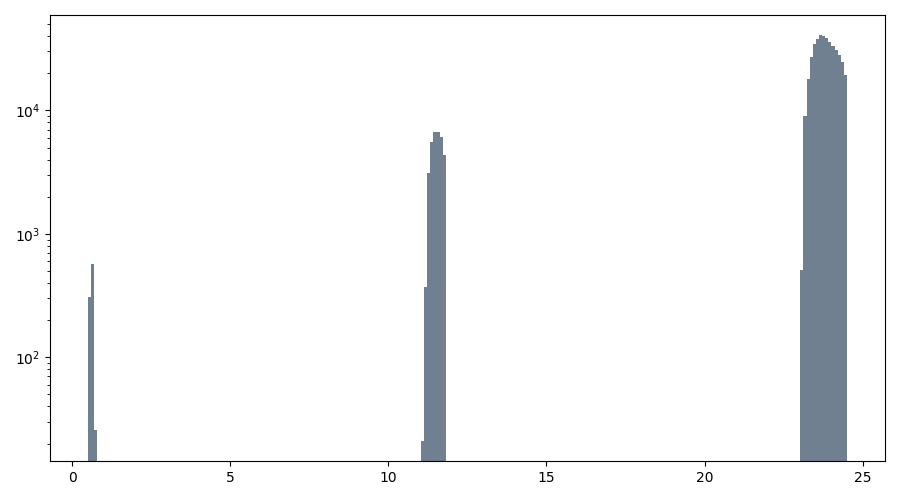

(None, None, None, None)

In [13]:
mc_seb_masked = mc_seb[mask]
tools.hist_plot(mc_seb_masked[mc_seb_masked < 100], variables, 0.1, label='mc',peaks_find=False, plot=True)

$\text{Plot ideal peak m/c:}$

The peak index for MRP calculation is: 1


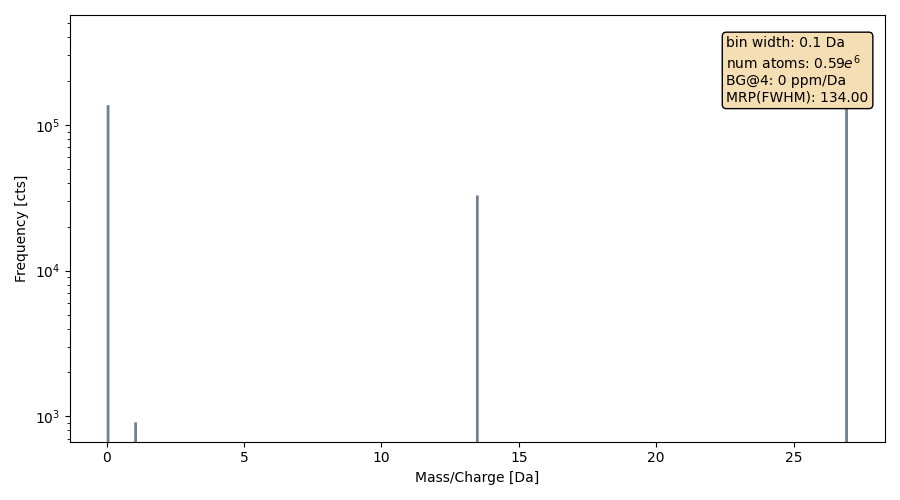

(array([ 1.00297398, 13.4398513 ]),
 array([  910., 32814.]),
 [[0.0, 0.9026765799256505, 1.0029739776951672],
  [0.0, 13.339553903345724, 13.43985130111524]],
 None)

In [14]:
tools.hist_plot(mc_seb_ideal, variables, 0.1, label='mc', peaks_find=True, plot=True)

$\text{Here we plot ions in each peak base on the TOF and (x,y) position}$

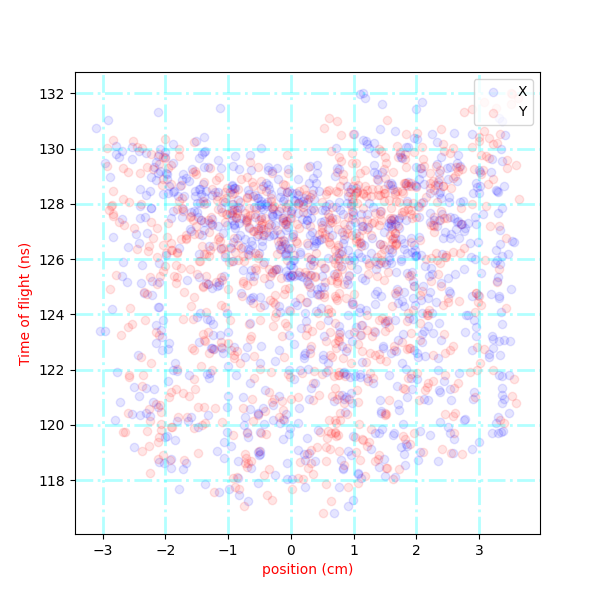

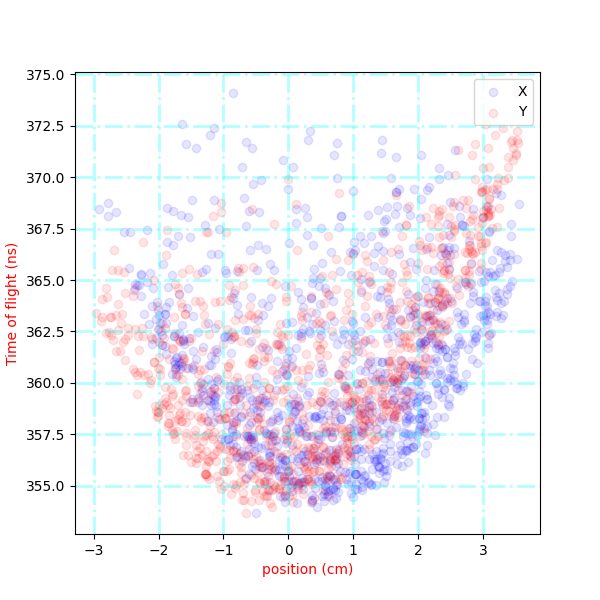

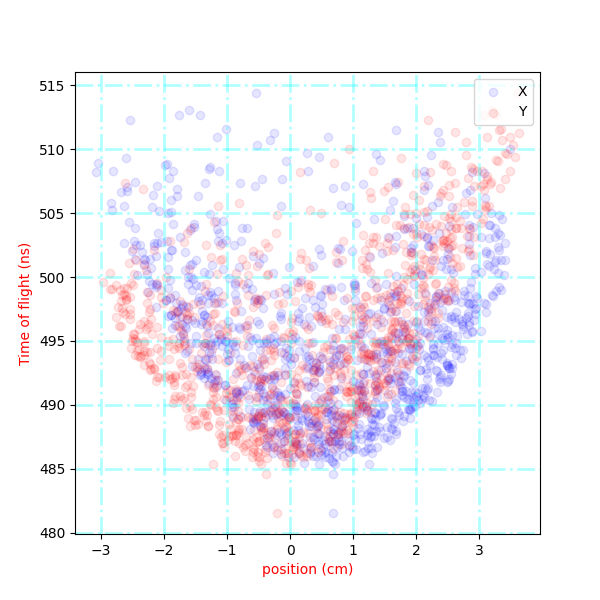

In [15]:
for i in range(len(pick_ions_plot)):
    fig1, ax1 = plt.subplots(figsize=(6, 6))
    dld_x_masked = dld_x[pick_ions_plot[i]]
    dld_y_masked = dld_y[pick_ions_plot[i]]
    dld_t_masked = dld_t[pick_ions_plot[i]]
    if len(dld_x_masked) > 1000:
        mask_plot = np.random.randint(0, len(dld_x_masked), 1000)
        x = plt.scatter(dld_x_masked[mask_plot], dld_t_masked[mask_plot], color="blue", label='X', alpha=0.1)
        y = plt.scatter(dld_y_masked[mask_plot], dld_t_masked[mask_plot], color="red", label='Y', alpha=0.1)
    else:
        x = plt.scatter(dld_x_masked, dld_t_masked, color="blue", label='X', alpha=0.1)
        y = plt.scatter(dld_y_masked, dld_t_masked, color="red", label='Y', alpha=0.1)
    ax1.set_ylabel("Time of flight (ns)", color="red", fontsize=10)
    ax1.set_xlabel("position (cm)", color="red", fontsize=10)
    plt.grid(color='aqua', alpha=0.3, linestyle='-.', linewidth=2)
    plt.legend(handles=[x, y], loc='upper right')
    plt.savefig(variables.result_path + 'position_peak.png', format="png", dpi=600)
    plt.savefig(variables.result_path + 'position_peak.svg', format="svg", dpi=600)
    plt.show()

$\text{As you saw the TOF changes base on the (x,y) of the events. Therefore we creat a mask to only select the ions in center (8m
m*8mm) of detector. This helps to cansel out the variation in TOF due to hit position}$

$\text{Reformulate the equation for volatege atom probe:}$<br>
$$t = d(\sqrt{\frac{\frac{m}{n}}{k\alpha (V_{dc}+\beta V_{pulse})}})-t_{0} $$<br>

(9493,)


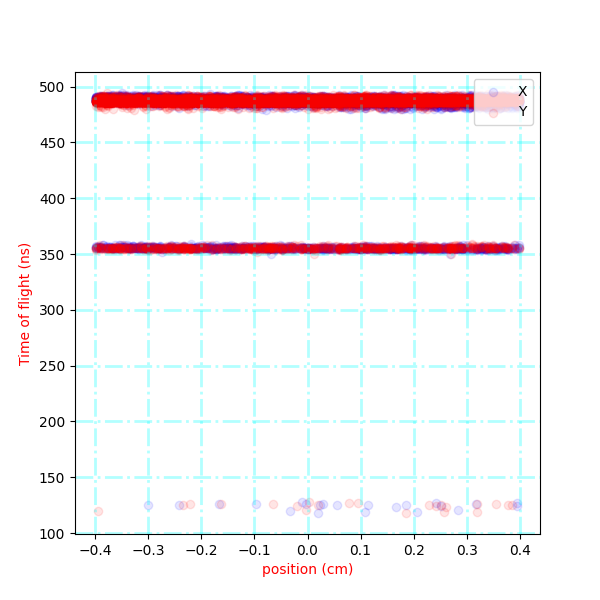

In [16]:
# use mask_equal to have equal number of ions for each peak
# only peak the value in the center of detector 8mm * 8mm
detector_squre = 0.4
vol_variation = 100
fig1, ax1 = plt.subplots(figsize=(6, 6))
dld_x_masked = dld_x[mask]
dld_y_masked = dld_y[mask]
dld_t_masked = dld_t[mask]
dld_highVoltage_masked = dld_highVoltage[mask]

mask_tmp_middle = np.logical_and((np.abs(dld_x_masked) < detector_squre), (np.abs(dld_y_masked) < detector_squre))
mask_tmp_mvoltage = mask_tmp_mvoltage = np.logical_and((dld_highVoltage_masked < (np.mean(dld_highVoltage_masked)+100)), (dld_highVoltage_masked > (np.mean(dld_highVoltage_masked)-100)))
mask_f = np.logical_and(mask_tmp_mvoltage, mask_tmp_middle)

dld_x_masked = dld_x_masked[mask_f]
dld_y_masked = dld_y_masked[mask_f]
dld_t_masked = dld_t_masked[mask_f]
dld_highVoltage_masked = dld_highVoltage_masked[mask_f]

mc_seb_reg_masked = mc_seb_ideal[mask]
mc_seb_reg_masked = mc_seb_reg_masked[mask_f]

print(dld_t_masked.shape)
x = plt.scatter(dld_x_masked, dld_t_masked, color="blue", label='X', alpha=0.1)
y = plt.scatter(dld_y_masked, dld_t_masked, color="red", label='Y', alpha=0.1)
ax1.set_ylabel("Time of flight (ns)", color="red", fontsize=10)
ax1.set_xlabel("position (cm)", color="red", fontsize=10)
plt.grid(color='aqua', alpha=0.3, linestyle='-.', linewidth=2)
plt.legend(handles=[x, y], loc='upper right')

plt.savefig(variables.result_path + 'center.png' , format="png", dpi=600)
plt.savefig(variables.result_path + 'center.svg' , format="svg", dpi=600)

plt.show()


$\text{We calculate the t_0 base on:}$<br>
$$t_{0} = \frac{\sum_{n=1}^n{\left (t - L_{flight}  \sqrt{\frac{m/n}{2eV}} \right )}}{n}$$<br>

In [17]:
seb_t = dld_t_masked * 1E-9  # tof in s
# seb_factor = np.sqrt(mc_seb_reg_ideal[mask_middle] * 1.66E-27 / (2 * 1.6E-19 * 1.015 * (dld_highVoltage_masked + 0.7 * dld_pulseVoltage_masked)))
seb_factor = np.sqrt(mc_seb_reg_masked * 1.66E-27 / (2 * 1.6E-19 * dld_highVoltage_masked))

seb_factor = seb_factor * 1E6
seb_t = seb_t * 1E9

t0_seb_fixed = np.mean(np.array([seb_t]).squeeze(0) - (flightPathLength_d.value * np.array([seb_factor]).squeeze(0).reshape(-1, 1)))
print('Linear fixed path lenght -- the flight path lenght(slop): {:.2f}'.format(flightPathLength_d.value), '(mm)', '\nthe corrected t_0(intercept): {:.2f}'.format(t0_seb_fixed), '(ns)')


Linear fixed path lenght -- the flight path lenght(slop): 110.00 (mm) 
the corrected t_0(intercept): 27.88 (ns)


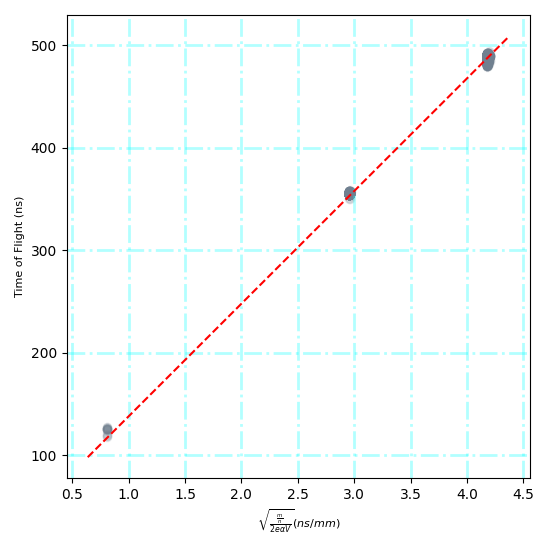

In [18]:
# Plot outputs
# fig1, ax1 = plt.subplots(figsize=(5.5/2.54, 5.5/2.54))
fig1, ax1 = plt.subplots(figsize=(5.5, 5.5))
peaks_data = plt.scatter(seb_factor, seb_t, label='Ions', alpha=0.1, color='slategray')
axes = plt.gca()
x_vals = np.array(axes.get_xlim())

linear_fix, = plt.plot(x_vals, t0_seb_fixed + flightPathLength_d.value * x_vals, '--', color='red', label='line' )

plt.grid(color='aqua', alpha=0.3, linestyle='-.', linewidth=2)
# plt.legend(handles=[linear_fix, peaks_data], loc='lower right')

ax1.set_ylabel("Time of Flight (ns)", fontsize=8)

ax1.set_xlabel(r"$\sqrt{\frac{\frac{m}{n}}{2e \alpha V}} (ns/mm)$", fontsize=8)
plt.tight_layout()
plt.savefig(variables.result_path + 'fixed_flight_path.svg', format="svg", dpi=600)
plt.savefig(variables.result_path + 'fixed_flight_path.png', format="png", dpi=600)

plt.show()

In [19]:
huber = linear_model.HuberRegressor(alpha=1E-9,epsilon=1)
huber.fit(np.array([seb_factor]).squeeze(0).reshape(-1, 1), np.array([seb_t]).squeeze(0))
d_seb_huber = huber.coef_.item()
t0_seb_huber = huber.intercept_.item()          
print('Huber -- 2 the corrected flight path lenght(slop): {:.2f}'.format(d_seb_huber), '(mm)', '\nthe corrected t_0(intercept): {:.2f}'.format(t0_seb_huber), '(ns)')

bayesian_ridge = linear_model.Ridge(alpha=1)
bayesian_ridge.fit(np.array([seb_factor]).squeeze(0).reshape(-1, 1) , np.array([seb_t]).squeeze(0))
d_seb_rigid = bayesian_ridge.coef_.item()
t0_seb_rigid = bayesian_ridge.intercept_.item()         
print('Rigid -- the corrected flight path lenght(slop): {:.2f}'.format(d_seb_rigid), '(mm)', '\nthe corrected t_0(intercept): {:.2f}'.format(t0_seb_rigid), '(ns)')
# Train the model using the data sets ( linear regression)
linear = linear_model.LinearRegression()
linear.fit(np.array([seb_factor]).squeeze(0).reshape(-1, 1), np.array([seb_t]).squeeze(0))
d_seb = linear.coef_.item()
t0_seb = linear.intercept_.item()

print('Linear -- the corrected flight path lenght(slop): {:.2f}'.format(d_seb), '(mm)', '\nthe corrected t_0(intercept): {:.2f}'.format(t0_seb), '(ns)')
# Train the model using the data sets ( Lasso regression)
lasso = linear_model.Lasso(alpha=1)
lasso.fit(np.array([seb_factor]).squeeze(0).reshape(-1, 1), np.array([seb_t]).squeeze(0))
d_seb_lasso = lasso.coef_.item()
t0_seb_lasso = lasso.intercept_.item() 
print('Lasso -- the corrected flight path lenght(slop): {:.2f}'.format(d_seb_lasso), '(mm)', '\nthe corrected t_0(intercept): {:.2f}'.format(t0_seb_lasso), '(ns)')


Huber -- 2 the corrected flight path lenght(slop): 107.67 (mm) 
the corrected t_0(intercept): 37.14 (ns)
Rigid -- the corrected flight path lenght(slop): 107.66 (mm) 
the corrected t_0(intercept): 37.39 (ns)
Linear -- the corrected flight path lenght(slop): 107.74 (mm) 
the corrected t_0(intercept): 37.07 (ns)
Lasso -- the corrected flight path lenght(slop): 100.81 (mm) 
the corrected t_0(intercept): 65.22 (ns)


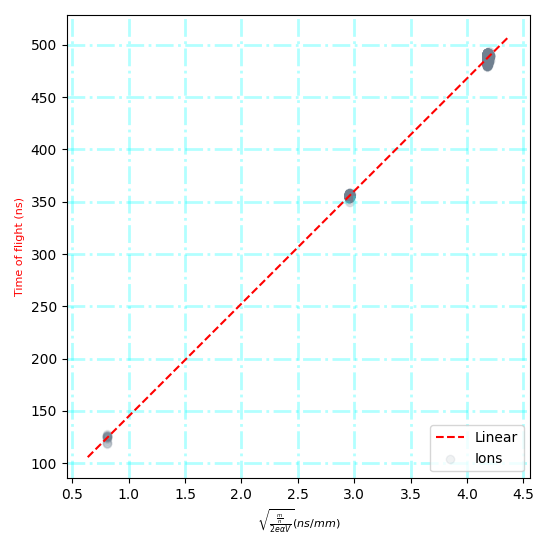

In [20]:
# Plot outputs

# fig1, ax1 = plt.subplots(figsize=(5.5/2.54, 5.5/2.54))
fig1, ax1 = plt.subplots(figsize=(5.5, 5.5))
peaks_data = plt.scatter(seb_factor, seb_t, color="slategray", label='Ions', alpha=0.1)
axes = plt.gca()
x_vals = np.array(axes.get_xlim())


linear, = plt.plot(x_vals, t0_seb + d_seb * x_vals, '--', color='r', label='Linear' )


plt.grid(color='aqua', alpha=0.3, linestyle='-.', linewidth=2)

# plt.legend(handles=[peaks_data, linear, rigid, huber,lasso], loc='lower right')
ax1.set_ylabel("Time of flight (ns)", color="red", fontsize=8)
ax1.set_xlabel(r"$\sqrt{\frac{\frac{m}{n}}{2e \alpha V}} (ns/mm)$", fontsize=8)
plt.legend(handles=[linear, peaks_data], loc='lower right')
plt.tight_layout()


plt.savefig(variables.result_path + 'regression.svg', format="svg", dpi=600)
plt.savefig(variables.result_path + 'regression.png', format="png", dpi=600)
    

plt.show()

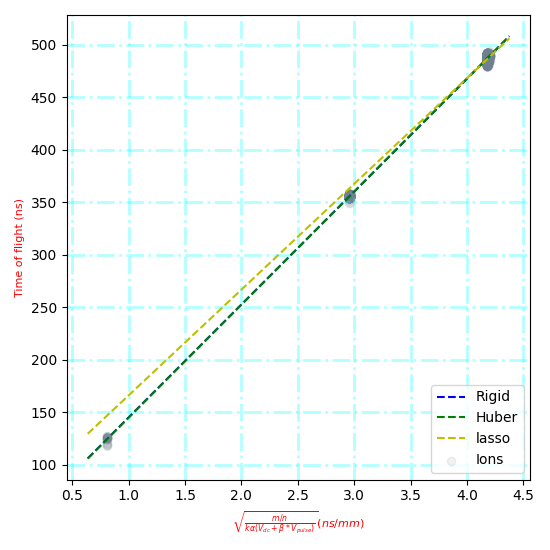

In [21]:
# Plot outputs


fig1, ax1 = plt.subplots(figsize=(5.5, 5.5))
peaks_data = plt.scatter(seb_factor, seb_t, color="slategray", label='Ions', alpha=0.1)
axes = plt.gca()
x_vals = np.array(axes.get_xlim())


rigid, = plt.plot(x_vals, t0_seb_rigid + d_seb_rigid * x_vals, '--', color='b', label='Rigid' )
huber, = plt.plot(x_vals, t0_seb_huber + d_seb_huber * x_vals, '--', color='g', label='Huber' )
lasso, = plt.plot(x_vals, t0_seb_lasso + d_seb_lasso * x_vals, '--', color='y', label='lasso' )

plt.grid(color='aqua', alpha=0.3, linestyle='-.', linewidth=2)

# plt.legend(handles=[peaks_data, linear, rigid, huber,lasso], loc='lower right')
ax1.set_ylabel("Time of flight (ns)", color="red", fontsize=8)
ax1.set_xlabel(r"$\sqrt{\frac{m/n}{k\alpha(V_{dc}+\beta*V_{pulse} )}} (ns/mm)$", color="red", fontsize=8)


plt.savefig(variables.result_path + 'regression.svg', format="svg", dpi=300)
plt.savefig(variables.result_path + 'regression.png', format="png", dpi=300)
    
plt.legend(handles=[rigid, huber,  lasso, peaks_data], loc='lower right')
plt.tight_layout()
plt.show()

In [22]:
t0_new = t0_seb
flightPathLength_new = d_seb

$\text{Plot the m/c with new ${t_0}$ :}$<br>

In [25]:
def tof_his_2(bin_size, prominence, t0_new, distance, percent, selector, plot, lim_mc, figname):
    mc = mc_tools.tof2mc(variables.dld_t, t0_new, dld_highVoltage,
                     variables.dld_x_det, variables.dld_y_det, flightPathLength_new, variables.dld_high_voltage, mode='dc_voltage')
    
    peaks, peaks_y, peak_widths, _ = tools.hist_plot(mc [mc  < lim_mc], variables, bin_size,  h_line=True, distance=distance, percent=percent, prominence=prominence,
                                                     selector=selector, plot=plot, label='mc', fig_name=figname, peaks_find_plot=True)

    index_max_ini = np.argmax(peaks_y)
    variables.max_peak = peaks[index_max_ini]
    mrp = (peaks[index_max_ini] / (peak_widths[index_max_ini][2] - peak_widths[index_max_ini][1]))
    print('Mass resolving power for the highest peak (MRP --> m/m_2-m_1):', mrp)
    for i in range(len(peaks)):
        print('Peaks ', i, 'is at location and height: ({:.2f}, {:.2f})'.format(peaks[i], peaks_y[i]), 'peak window sides (half-maximum) are: ({:.2f}, {:.2f})'.format(peak_widths[i][1], peak_widths[i][2]))

In [29]:

interact_manual(tof_his_2, bin_size=widgets.FloatText(value=0.1), t0_new=widgets.FloatText(value=t0_new)
               ,prominence=widgets.IntText(value=50), distance=widgets.IntText(value=10), lim_mc=widgets.IntText(value=400)
               ,percent=widgets.IntText(value=80), selector=[('peak','peak'), ('rect', 'rect')], plot=fixed(True), figname=widgets.Text(value='hist'));


C:\Users\APTUser\AppData\Local\Temp\ipykernel_45516\2871570993.py:1: DeprecationWarning: on_submit is deprecated. Instead, set the .continuous_update attribute to False and observe the value changing with: mywidget.observe(callback, 'value').
  interact_manual(tof_his_2, bin_size=widgets.FloatText(value=0.1), t0_new=widgets.FloatText(value=t0_new)


interactive(children=(FloatText(value=0.1, description='bin_size'), IntText(value=50, description='prominence'…